In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
learning_epochs = 1000

def sigmoid(x):
    return 1./(1. + np.exp(-x))

In [3]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

In [4]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(-(w[1] * X + w[0]))
cost = tf.reduce_mean(-tf.log(y_model * Y + (1-y_model) * (1-Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(learning_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < .00001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})
    


(0, 0.69314593)
(1, 0.65330237)
(2, 0.61740249)
(3, 0.58502859)
(4, 0.55579227)
(5, 0.52933961)
(6, 0.50535184)
(7, 0.48354656)
(8, 0.46367401)
(9, 0.44551432)
(10, 0.42887557)
(11, 0.41358939)
(12, 0.39950874)
(13, 0.38650572)
(14, 0.37446752)
(15, 0.36329573)
(16, 0.35290414)
(17, 0.34321669)
(18, 0.33416638)
(19, 0.32569423)
(20, 0.31774798)
(21, 0.31028065)
(22, 0.30325136)
(23, 0.29662326)
(24, 0.29036304)
(25, 0.28444129)
(26, 0.27883157)
(27, 0.27350977)
(28, 0.26845449)
(29, 0.2636461)
(30, 0.25906706)
(31, 0.25470111)
(32, 0.25053385)
(33, 0.24655172)
(34, 0.24274275)
(35, 0.23909581)
(36, 0.2356005)
(37, 0.23224765)
(38, 0.22902842)
(39, 0.22593507)
(40, 0.22296011)
(41, 0.22009689)
(42, 0.21733914)
(43, 0.214681)
(44, 0.21211699)
(45, 0.20964228)
(46, 0.20725214)
(47, 0.20494209)
(48, 0.20270835)
(49, 0.20054694)
(50, 0.19845431)
(51, 0.19642727)
(52, 0.1944627)
(53, 0.19255772)
(54, 0.19070956)
(55, 0.18891555)
(56, 0.18717349)
(57, 0.18548097)
(58, 0.18383591)
(59, 0.18223

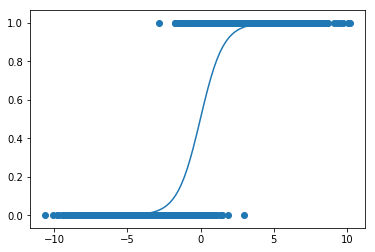

In [6]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(-(all_xs * w_val[1] + w_val[0])))
plt.show()

In [8]:
learning_rate = 0.1
training_epochs = 2000

x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)

x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0] * len(x1_label1) + [1] * len(x1_label2))

In [10]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)
                                   
y_model = tf.sigmoid(-(w[2] * X2 + w[1] * X1 + w[0]))
cost = tf.reduce_mean(-tf.log(y_model * Y + (1-y_model) * (1-Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(learning_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 1000):
    for x2_test in np.linspace(0, 10, 1000):
        z = sigmoid(-x2_test*w_val[2] - x1_test* w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)



(0, 0.69314593)
(1, 0.60945028)
(2, 0.60293001)
(3, 0.59826982)
(4, 0.5937317)
(5, 0.58930159)
(6, 0.58497471)
(7, 0.58074743)
(8, 0.57661575)
(9, 0.57257563)
(10, 0.56862366)
(11, 0.56475645)
(12, 0.56097043)
(13, 0.5572623)
(14, 0.55362898)
(15, 0.55006844)
(16, 0.54657722)
(17, 0.54315233)
(18, 0.53979206)
(19, 0.53649354)
(20, 0.53325456)
(21, 0.53007281)
(22, 0.52694643)
(23, 0.52387327)
(24, 0.52085137)
(25, 0.51787931)
(26, 0.51495492)
(27, 0.51207668)
(28, 0.50924313)
(29, 0.50645256)
(30, 0.50370377)
(31, 0.5009954)
(32, 0.49832606)
(33, 0.49569425)
(34, 0.49309915)
(35, 0.49053967)
(36, 0.48801422)
(37, 0.48552227)
(38, 0.48306277)
(39, 0.48063454)
(40, 0.47823706)
(41, 0.47586915)
(42, 0.47352996)
(43, 0.47121868)
(44, 0.4689348)
(45, 0.46667767)
(46, 0.46444631)
(47, 0.46224004)
(48, 0.46005842)
(49, 0.45790076)
(50, 0.45576653)
(51, 0.45365503)
(52, 0.45156595)
(53, 0.44949871)
(54, 0.44745257)
(55, 0.44542718)
(56, 0.44342226)
(57, 0.44143716)
(58, 0.43947163)
(59, 0.4375

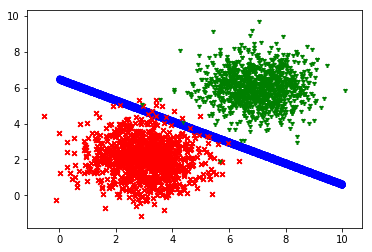

In [14]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()